# Tutorial 1  for JetSeT v1.2.0-rc3

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import numpy as np

## Basic setup and access to Jet class

In [2]:
import jetset

In [3]:
print(jetset.__version__)

1.2.0-rc3


See for more details:

-     https://jetset.readthedocs.io/en/latest/user_guide/jet_model_phys_SSC/Jet_example_phys_SSC.html


In [4]:
from jetset.jet_model import Jet
my_jet=Jet(electron_distribution='lppl')

In [5]:
Jet.available_electron_distributions()


lp: log-parabola
pl: powerlaw
lppl: log-parabola with low-energy powerlaw branch
lpep: log-parabola defined by peak energy
plc: powerlaw with cut-off
bkn: broken powerlaw
superexp: powerlaw with super-exp cut-off


In [6]:
my_jet.show_pars()


 model name        name             par type           units           val      phys. bound. min phys. bound. max  log  frozen
------------ ---------------- ------------------- ---------------- ------------ ---------------- ---------------- ----- ------
jet_leptonic                R         region_size               cm 5.000000e+15     1.000000e+03     1.000000e+30 False  False
jet_leptonic              R_H     region_position               cm 1.000000e+17     0.000000e+00               -- False   True
jet_leptonic                B      magnetic_field                G 1.000000e-01     0.000000e+00               -- False  False
jet_leptonic         beam_obj             beaming  Lorentz-factor* 1.000000e+01     1.000000e-04               -- False  False
jet_leptonic           z_cosm            redshift                  1.000000e-01     1.000000e-10               -- False  False
jet_leptonic             gmin  low-energy-cut-off lorentz-factor** 2.000000e+00     1.000000e+00     1.000000e+

In [7]:
my_jet.parameters.par_table


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
str12,str16,str19,object,float64,float64,float64,bool,bool
jet_leptonic,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,G,1.000000e-01,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,Lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,1.000000e-01,1.000000e-10,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor**,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor**,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor**,1.000000e+04,1.000000e+00,1.000000e+09,False,False


In [8]:
my_jet.show_model()



-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: jet_leptonic  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu grid size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-120

 model name        name             par type           units           val      phys. bound. min phys. bound. max  log  frozen
-----------

In [9]:
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=1E15)
my_jet.set_par('N',val=1E3)

In [10]:
my_jet.parameters.B.val=0.2
my_jet.parameters.r.val=0.4

In [11]:
my_jet.show_electron_distribution()


-------------------------------------------------------------------------------------------------------------------
electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

 model name        name             par type           units           val      phys. bound. min phys. bound. max  log  frozen
------------ ---------------- ------------------- ---------------- ------------ ---------------- ---------------- ----- ------
jet_leptonic                B      magnetic_field                G 2.000000e-01     0.000000e+00               -- False  False
jet_leptonic                N    emitters_density          1 / cm3 1.000000e+03     0.000000e+00               -- False  False
jet_leptonic                R         region_size               cm 1.000000e+15     1.000000e+03     1.000000e+30 False  False
jet_leptonic              R_H     region_position               cm 1.000000e+17     0.00

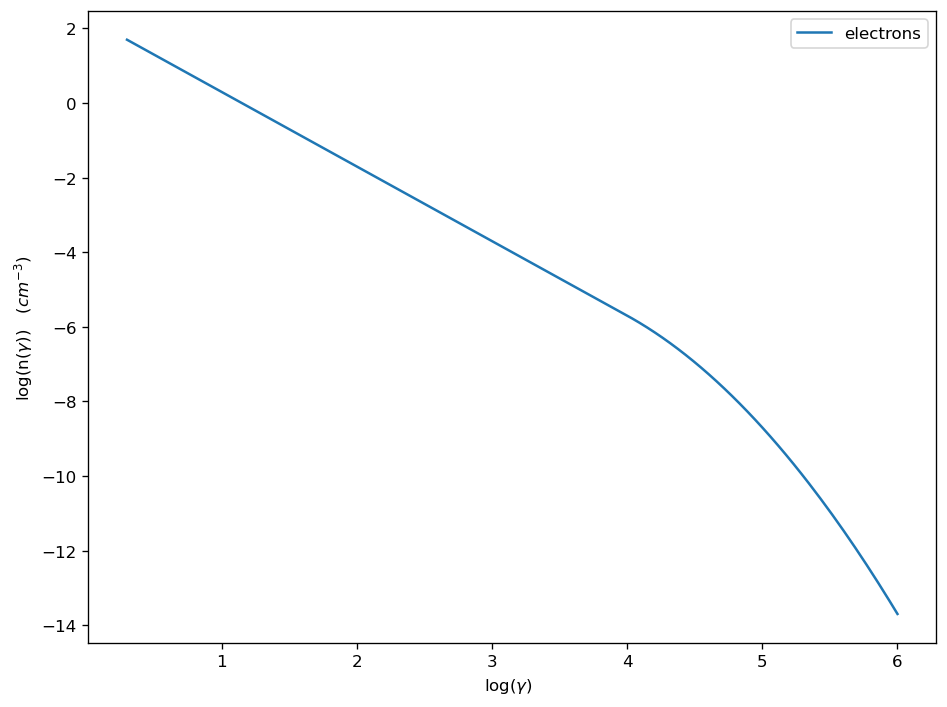

In [12]:
p=my_jet.electron_distribution.plot()

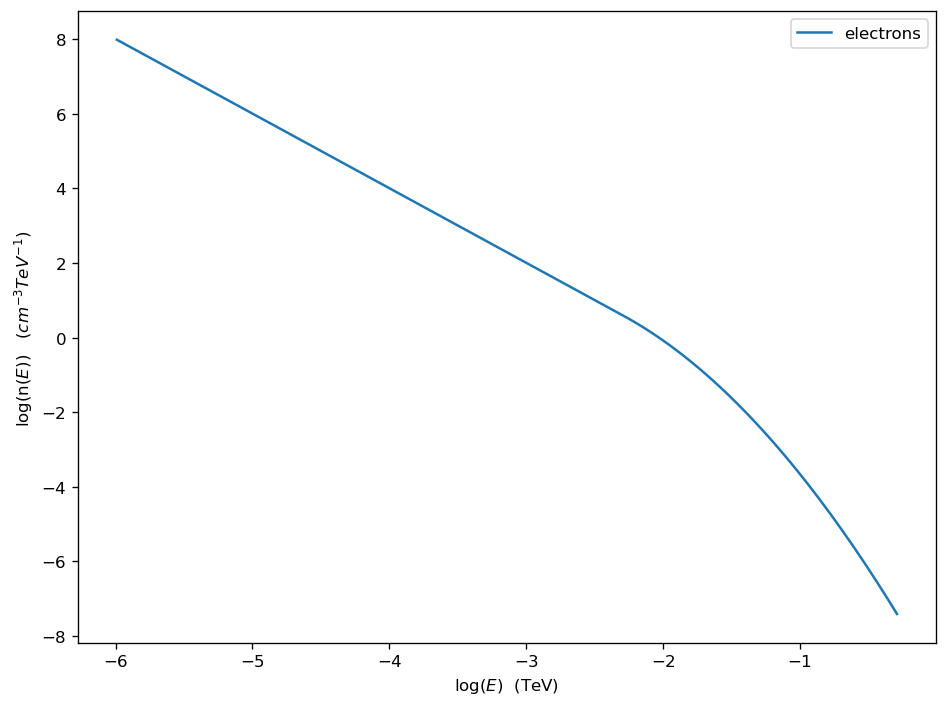

In [13]:
p=my_jet.electron_distribution.plot(energy_unit='TeV')

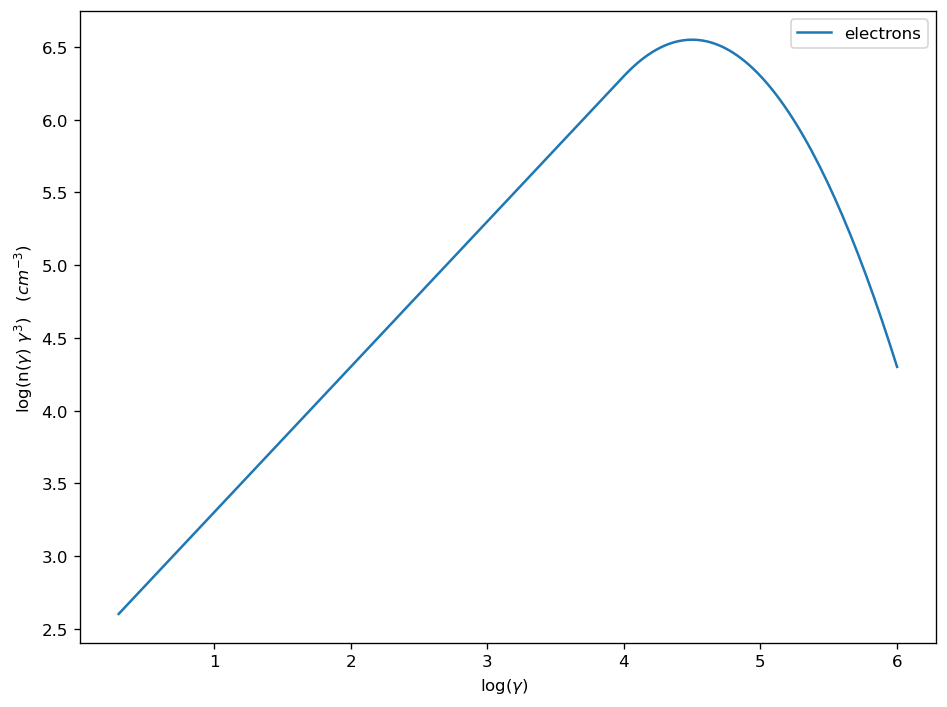

In [14]:
p=my_jet.electron_distribution.plot3p()


In [15]:
my_jet.eval()

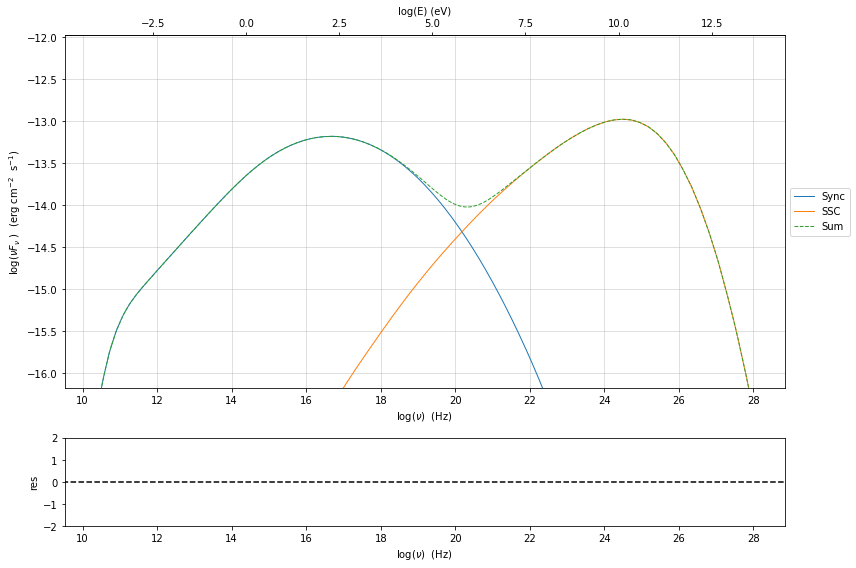

In [16]:
from jetset.plot_sedfit import PlotSED
my_plot=PlotSED()
my_plot=my_jet.plot_model(plot_obj=my_plot)
#my_plot.rescale(y_max=-12,y_min=-17.5,x_min=8)

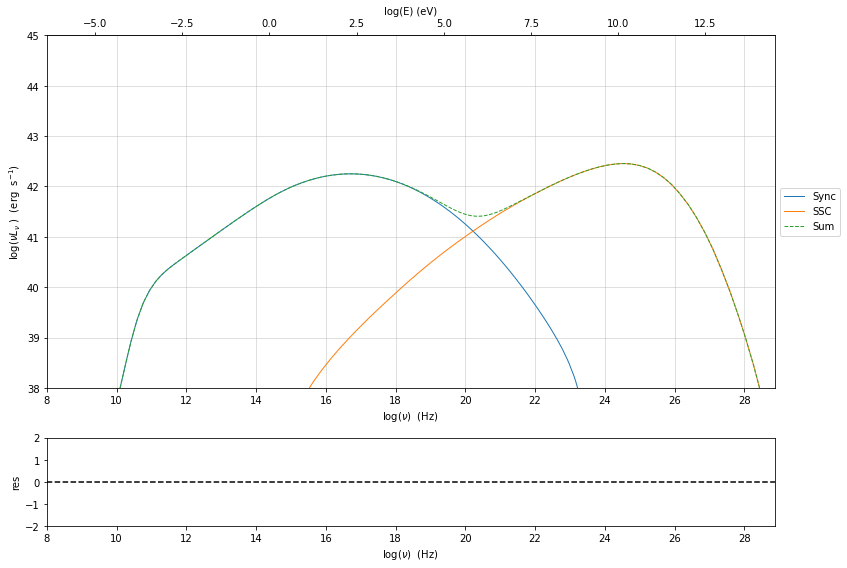

In [17]:
my_plot=my_jet.plot_model(frame='src')
my_plot.rescale(y_max=45,y_min=38,x_min=8)

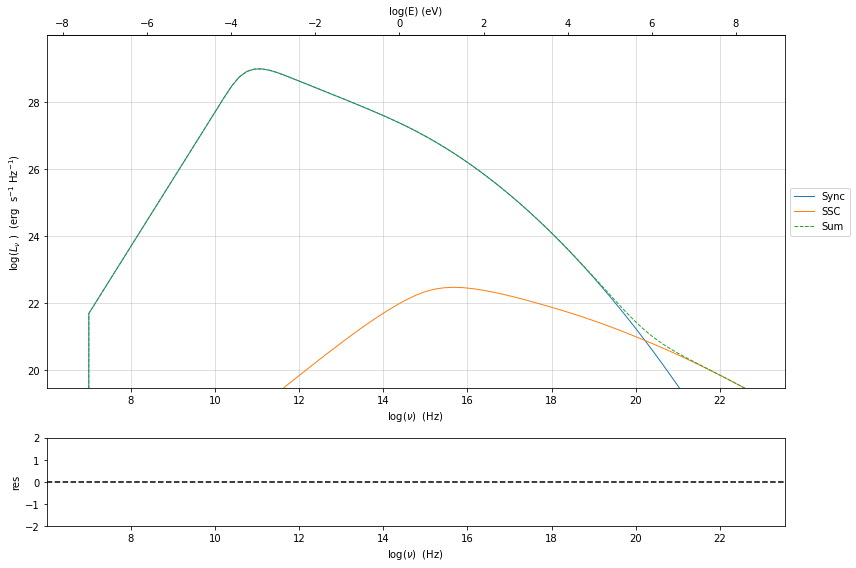

In [18]:
my_plot=my_jet.plot_model(frame='src',density=True)


In [19]:
my_jet.list_spectral_components()


Sum
Sync
SSC


In [20]:
Sync=my_jet.spectral_components.Sync


In [21]:
Sync=my_jet.get_spectral_component_by_name('Sync')


In [22]:
nu_sync=Sync.SED.nu
nuFnu_sync=Sync.SED.nuFnu

In [23]:
nu_sync_src=Sync.SED.nu_src
nuLnu_sync_src=Sync.SED.nuLnu_src

In [24]:
my_jet.spectral_components.build_table(restframe='obs')
t_obs=my_jet.spectral_components.table

In [25]:
t_obs[::10]


nu,Sum,Sync,SSC
Hz,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s)
float64,float64,float64,float64
1000000.0,1e-120,1e-120,1e-120
3026648.059395689,1e-120,1e-120,1e-120
9160598.47544371,1.8603797396850114e-27,1.8603797396850114e-27,1e-120
27725907.59860481,5.159536341816603e-26,5.159536341816603e-26,1e-120
83916564.42830162,1.4313798275006392e-24,1.4313798275006392e-24,1e-120
253985906.87807292,3.973556356524939e-23,3.973556356524939e-23,1e-120
768725952.1663721,1.1046717952196377e-21,1.1046717952196377e-21,1e-120
2326662911.331458,3.080805682218947e-20,3.080805682218947e-20,1e-120


In [26]:
my_jet.spectral_components.build_table(restframe='src')
t_src=my_jet.spectral_components.table

In [27]:
t_obs['Sync'][::10].to('GeV/cm2 s')

<Quantity [6.24150907e-118, 6.24150907e-118, 1.16115770e-024,
           3.22032929e-023, 8.93397018e-022, 2.48009881e-020,
           6.89481903e-019, 1.92288766e-017, 5.39546375e-016,
           1.43971905e-014, 1.47242935e-013, 4.30811381e-013,
           7.93047558e-013, 1.37869693e-012, 2.38858295e-012,
           4.11308030e-012, 6.97841919e-012, 1.14712371e-011,
           1.77765107e-011, 2.52478913e-011, 3.26862082e-011,
           3.85098848e-011, 4.11054360e-011, 3.98670033e-011,
           3.51138251e-011, 2.79676055e-011, 2.01954050e-011,
           1.32229620e-011, 7.82247636e-012, 4.18742550e-012,
           2.03022312e-012, 8.88984658e-013, 3.51622913e-013,
           1.25682603e-013, 3.99830638e-014, 1.00017129e-014,
           1.00606284e-015, 3.47082969e-018, 1.59218601e-025,
           6.24150907e-118, 6.24150907e-118, 6.24150907e-118,
           6.24150907e-118, 6.24150907e-118, 6.24150907e-118,
           6.24150907e-118, 6.24150907e-118, 6.24150907e-118,
        

In [28]:
t_src.write('test_SED.txt',format='ascii.ecsv',overwrite=True)


In [29]:
my_jet.energetic_report()


-----------------------------------------------------------------------------------------
jet eneregetic report:
     name                   type               units       val     
-------------- ----------------------------- --------- ------------
           U_e Energy dens. blob rest. frame erg / cm3 4.950261e-01
      U_p_cold Energy dens. blob rest. frame erg / cm3 0.000000e+00
           U_B Energy dens. blob rest. frame erg / cm3 1.591549e-03
           U_p Energy dens. blob rest. frame erg / cm3 0.000000e+00
    U_p_target Energy dens. blob rest. frame erg / cm3 0.000000e+00
       U_Synch Energy dens. blob rest. frame erg / cm3 1.316122e-02
   U_Synch_DRF Energy dens. disk rest. frame erg / cm3 1.316122e+02
        U_Disk Energy dens. blob rest. frame erg / cm3 0.000000e+00
         U_BLR Energy dens. blob rest. frame erg / cm3 0.000000e+00
          U_DT Energy dens. blob rest. frame erg / cm3 0.000000e+00
         U_CMB Energy dens. blob rest. frame erg / cm3 0.000000e+00
   

In [30]:
my_jet.energetic_report_table


name,type,units,val
str14,str29,object,float64
U_e,Energy dens. blob rest. frame,erg / cm3,4.950261e-01
U_p_cold,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_B,Energy dens. blob rest. frame,erg / cm3,1.591549e-03
U_p,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_p_target,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_Synch,Energy dens. blob rest. frame,erg / cm3,1.316122e-02
U_Synch_DRF,Energy dens. disk rest. frame,erg / cm3,1.316122e+02
U_Disk,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_BLR,Energy dens. blob rest. frame,erg / cm3,0.000000e+00


In [31]:
my_jet.save_model('test_model.pkl')


In [32]:
my_jet_new=Jet.load_model('test_model.pkl')


 model name        name             par type           units           val      phys. bound. min phys. bound. max  log  frozen
------------ ---------------- ------------------- ---------------- ------------ ---------------- ---------------- ----- ------
jet_leptonic             gmin  low-energy-cut-off lorentz-factor** 1.000000e+02     1.000000e+00     1.000000e+09 False  False
jet_leptonic             gmax high-energy-cut-off lorentz-factor** 1.000000e+08     1.000000e+00     1.000000e+15 False  False
jet_leptonic                N    emitters_density          1 / cm3 1.000000e+03     0.000000e+00               -- False  False
jet_leptonic gamma0_log_parab    turn-over-energy lorentz-factor** 5.000000e+03     1.000000e+00     1.000000e+09 False  False
jet_leptonic                s   LE_spectral_slope                  2.000000e+00    -1.000000e+01     1.000000e+01 False  False
jet_leptonic                r  spectral_curvature                  4.000000e-01    -1.500000e+01     1.500000e+

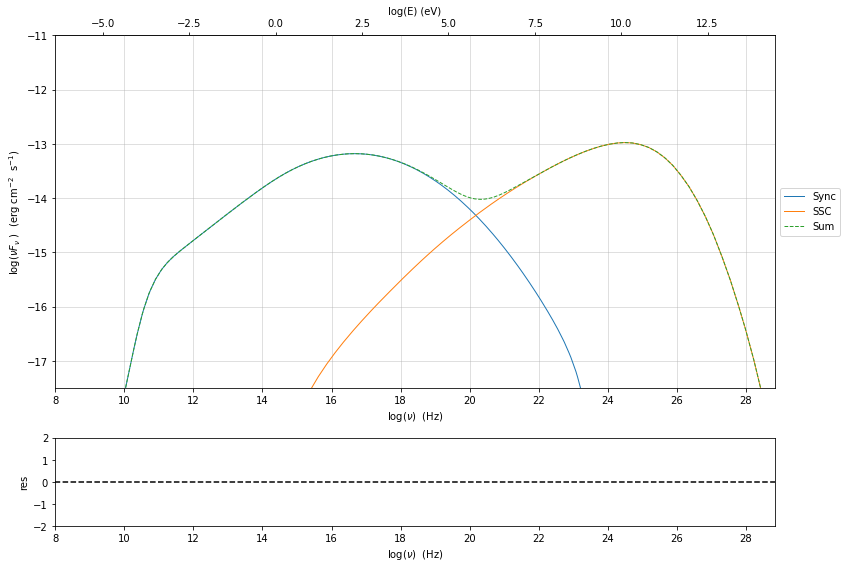

In [33]:
my_plot=my_jet_new.plot_model()
my_plot.rescale(y_max=-11,y_min=-17.5,x_min=8)

## Define custom emiotters distribution

See for more details:

-     https://jetset.readthedocs.io/en/latest/user_guide/custom_emitters_distr/custom_emitters.html

In [34]:
from jetset.jet_emitters import EmittersDistribution


In [35]:
def distr_func_super_exp(gamma,gamma_cut,s,a):
    return np.power(gamma,-s)*np.exp(-(1/a)*(gamma/gamma_cut)**a)

In [36]:
n_e_super_exp=EmittersDistribution('super_exp',spectral_type='plc',normalize=False)
n_e_super_exp.add_par('gamma_cut',par_type='turn-over-energy',val=50000.,vmin=1., vmax=None, unit='lorentz-factor')
n_e_super_exp.add_par('s',par_type='LE_spectral_slope',val=2.3,vmin=-10., vmax=10, unit='')
n_e_super_exp.add_par('a',par_type='spectral_curvature',val=1.8,vmin=0., vmax=100., unit='')

In [37]:
n_e_super_exp.set_distr_func(distr_func_super_exp)


In [38]:
n_e_super_exp.parameters.show_pars()


   name         par type           units          val      phys. bound. min phys. bound. max  log  frozen
--------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
     gmin  low-energy-cut-off lorentz-factor* 2.000000e+00     1.000000e+00     1.000000e+09 False  False
     gmax high-energy-cut-off lorentz-factor* 1.000000e+06     1.000000e+00     1.000000e+15 False  False
        N    emitters_density         1 / cm3 1.000000e+02     0.000000e+00               -- False  False
gamma_cut    turn-over-energy lorentz-factor* 5.000000e+04     1.000000e+00               -- False  False
        s   LE_spectral_slope                 2.300000e+00    -1.000000e+01     1.000000e+01 False  False
        a  spectral_curvature                 1.800000e+00     0.000000e+00     1.000000e+02 False  False


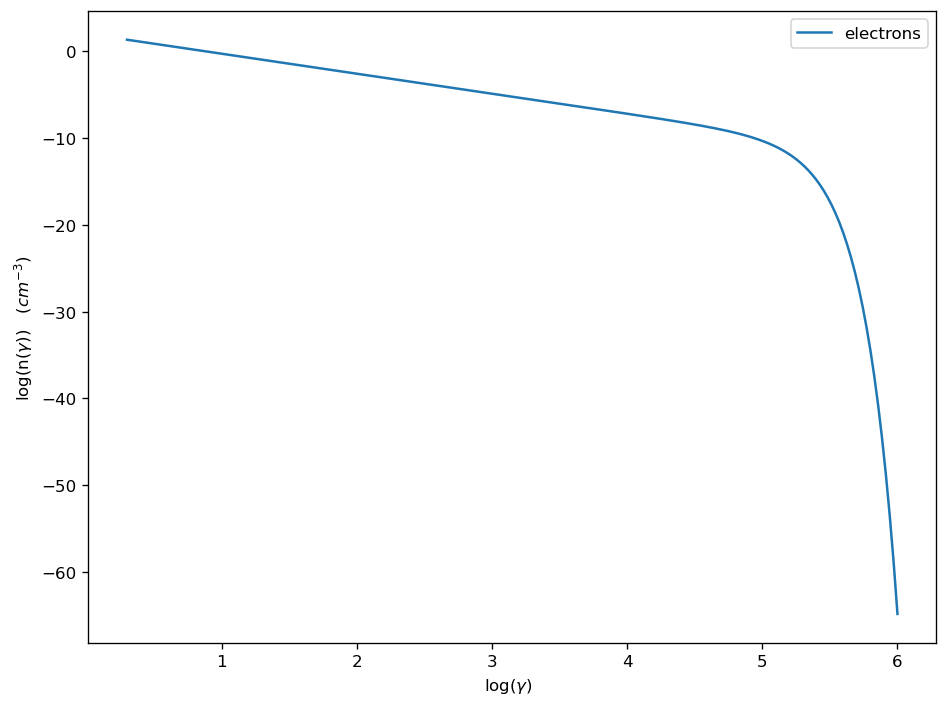

In [39]:
p=n_e_super_exp.plot()


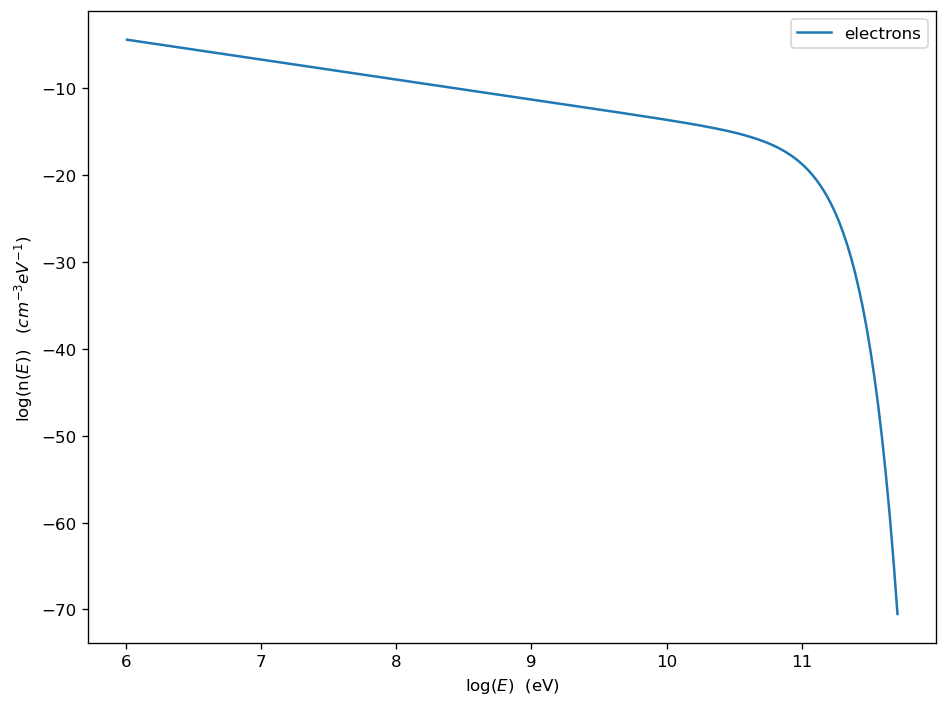

In [40]:
p=n_e_super_exp.plot(energy_unit='eV')


In [41]:
from jetset.jet_model import Jet
my_jet=Jet(electron_distribution=n_e_super_exp)

In [42]:
n_e_super_exp.normalize

False

In [43]:
my_jet.electron_distribution.normalize

False

In [44]:
my_jet.parameters.N.val=5E4
my_jet.show_model()
my_jet.IC_nu_size=100
my_jet.eval()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: jet_leptonic  

electrons distribution:
 type: super_exp  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  False
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu grid size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-120

 model name     name         par type           units           val      phys. bound. min phys. bound. max  log  frozen
------------

In [45]:
my_jet.eval()


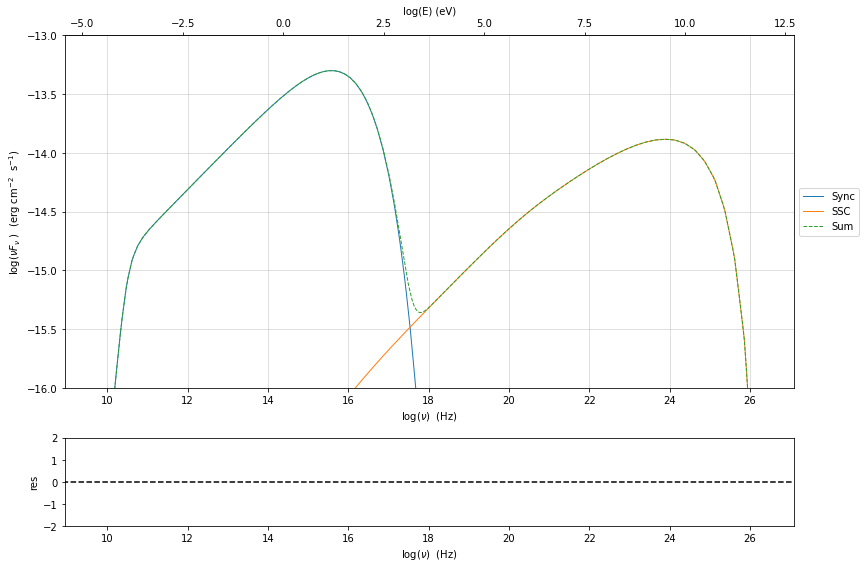

In [46]:
p=my_jet.plot_model()
p.rescale(y_min=-16,y_max=-13)

In [47]:
my_jet.electron_distribution.normalize=True

In [48]:

my_jet.parameters.N.val=5E4
my_jet.show_model()
my_jet.IC_nu_size=100
my_jet.eval()



-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: jet_leptonic  

electrons distribution:
 type: super_exp  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu grid size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-120

 model name     name         par type           units           val      phys. bound. min phys. bound. max  log  frozen
------------ 

In [49]:
my_jet.plot_model(p,comp='Sum',label='Normalized distr')
p.rescale(y_min=-16,y_max=-12)

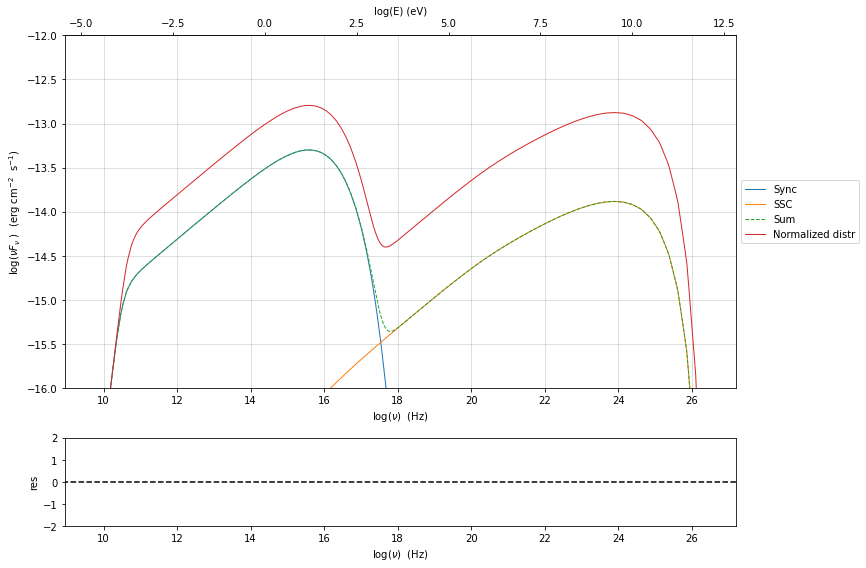

In [50]:
p.fig